# Create maps of California to show change in key indicators by county

In [2]:
#importing modules to analyze and plot thes data.
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot
from shapely.geometry import Point
import matplotlib.colors

In [3]:
# Check to make sure where I am in file structure
pwd

'/Users/dannytobin/code4policy/climate4policy/final_analysis'

In [4]:
# check to make sure data is here
ls

Cali_maps.ipynb           output/
getprism.sh*              prism_climate_indicators/


In [3]:
# Make a link to the file directory (which I didn't use) and load in shapefile of california
prism_dir = 'prism_climate_indicators/'
cal_counties = gpd.read_file('prism_climate_indicators/CA_counties_shp/CA_Counties_TIGER2016.shp')

In [8]:
# Make sure shapefile looks okay by showing first 5 lines
cal_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,,,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,42200,,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,,,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


In [4]:
# Rename a couple of columns
cal_counties.rename(columns = {'INTPTLAT' :'latitude'}, inplace = True)
cal_counties.rename(columns = {'INTPTLON' :'longitude'}, inplace = True)

cal_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,latitude,longitude,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,,,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,42200,,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,,,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


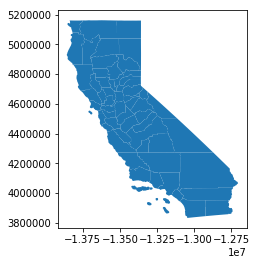

In [10]:
# Do a test plot
cal_counties.plot()

In [5]:
# Load in clean csv from stata with pandas
calclimate = 'output/calcounties_all.csv'
cal_indicators = pd.read_csv(calclimate)

#showing the first 10 rows
cal_indicators.head(10)

,idnum,id,latitude,longitude,county,maxtemp_coeff,meantemp_coeff,precip_change
0,1,37.6464_-121.8861,37.6464,-121.8861,Alameda,-0.000187,0.005605,-0.007452
1,2,38.5973_-119.8207,38.5973,-119.8207,Alpine,0.079270,0.129379,-0.021833
2,3,38.4461_-120.6520,38.4461,-120.6520,Amador,-0.012297,0.025934,0.000149
3,4,39.6670_-121.6006,39.6670,-121.6006,Butte,0.032539,0.051617,-0.009674
4,5,38.2047_-120.5541,38.2047,-120.5541,Calaveras,0.017638,0.048799,-0.006349
5,6,39.1776_-122.2370,39.1776,-122.2370,Colusa,0.043928,0.040569,-0.008936
6,7,37.9192_-121.9263,37.9192,-121.9263,Contra Costa,-0.034007,-0.003530,-0.002143
7,8,41.7431_-123.8968,41.7431,-123.8968,Del Norte,-0.009894,0.020074,-0.000218
8,9,38.7786_-120.5248,38.7786,-120.5248,El Dorado,0.022704,0.050351,-0.005403
9,10,36.7584_-119.6504,36.7584,-119.6504,Fresno,0.063499,0.049219,-0.005218


In [12]:
# check to see data is right size (we expect 58 rows - 1 per county)
cal_indicators.shape

(58, 8)

In [6]:
# Make sure columns are named the same to allow for merge of datasets
cal_counties.rename(columns = {'NAME' :'COUNTY'}, inplace = True)
cal_indicators.rename(columns = {'county' :'COUNTY'}, inplace = True)


In [15]:
# To merge on location I would need to set index - to merge on column I should not
#cal_indicators = cal_indicators.set_index('COUNTY')
#cal_counties = cal_counties.set_index('COUNTY')

In [7]:
# Merge the shapefile and temperature data based on the county column
county_temps = cal_counties.merge(cal_indicators, on="COUNTY")
# check to make sure it worked
county_temps.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,COUNTY,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,latitude_x,longitude_x,geometry,idnum,id,latitude_y,longitude_y,maxtemp_coeff,meantemp_coeff,precip_change
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,...,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...,46,39.5804_-120.5161,39.5804,-120.5161,0.043961,0.086002,-0.016183
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,34,38.4493_-121.3438,38.4493,-121.3438,0.026809,0.017364,-0.010149
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,...,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...,42,34.6730_-120.0167,34.6730,-120.0167,0.048590,0.019093,-0.016518
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,...,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ...",5,38.2047_-120.5541,38.2047,-120.5541,0.017638,0.048799,-0.006349
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...,56,34.4566_-119.0836,34.4566,-119.0836,0.032605,0.009952,-0.021105


In [99]:
# Make sure I have all 58 counties after merge
county_temps.shape

(58, 25)

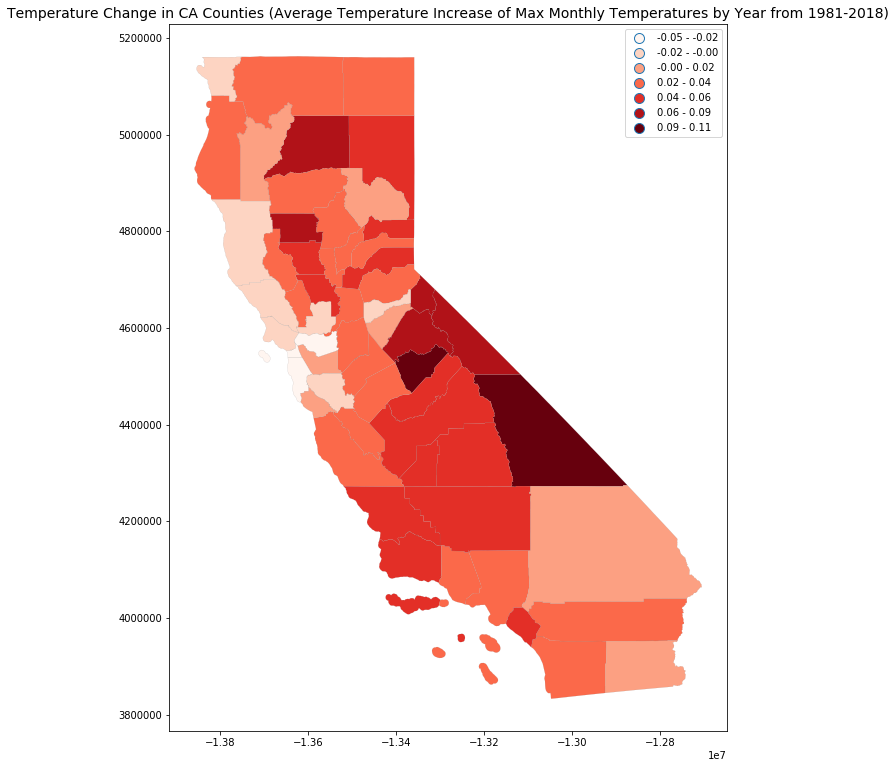

In [24]:
# I experimented a lot to get here (deleted redundant cells)
# Show max monthly temperature change by county 
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='maxtemp_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Temperature Change in CA Counties (Average Temperature Increase of Max Monthly Temperatures by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_tempmapwithlegend.png')



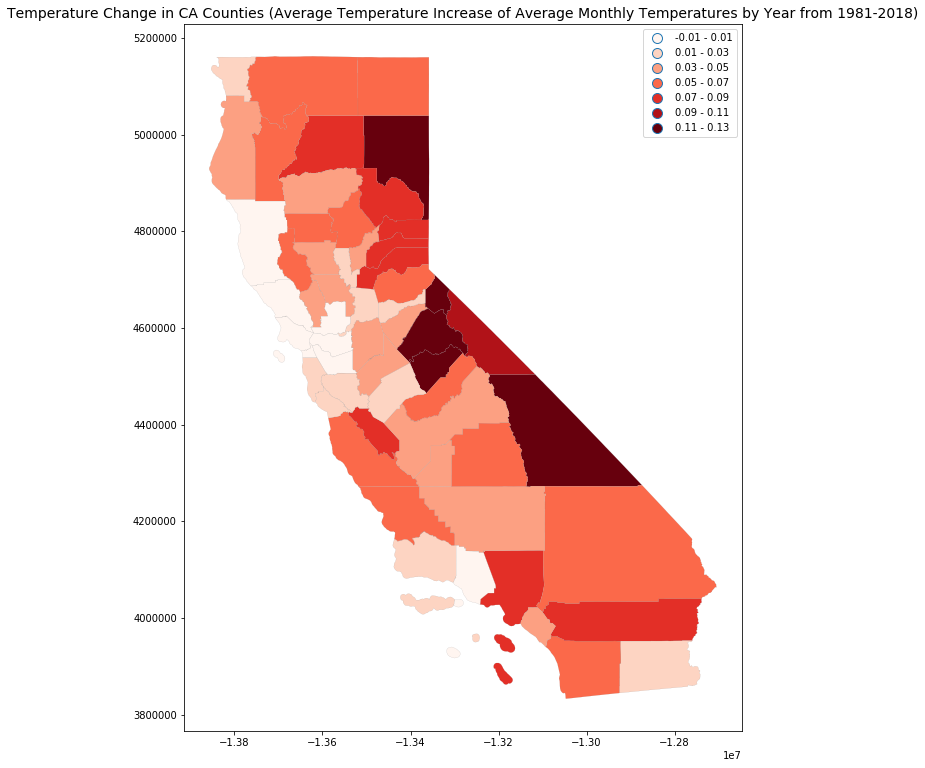

In [25]:
# Show Temperature change by county (mean temperature per month change)
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='meantemp_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Temperature Change in CA Counties (Average Temperature Increase of Average Monthly Temperatures by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_meantempmapwithlegend.png')


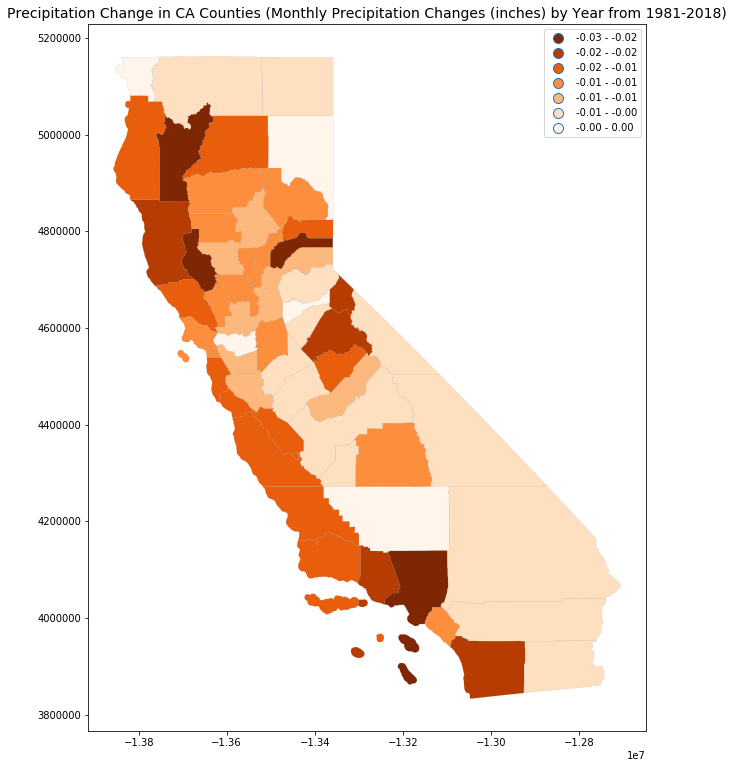

In [28]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='precip_change', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Oranges_r, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Precipitation Change in CA Counties (Monthly Precipitation Changes (inches) by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_meantempmapwithlegend.png')


In [8]:
# Create the same plots but with total change over the time period rather than yearly change
# First create columns
# Test on one indicator
county_temps["total_precip_change"] = county_temps["precip_change"] * 37
county_temps.head()


,STATEFP,COUNTYFP,COUNTYNS,GEOID,COUNTY,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,longitude_x,geometry,idnum,id,latitude_y,longitude_y,maxtemp_coeff,meantemp_coeff,precip_change,total_precip_change
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,...,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...,46,39.5804_-120.5161,39.5804,-120.5161,0.043961,0.086002,-0.016183,-0.598774
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,34,38.4493_-121.3438,38.4493,-121.3438,0.026809,0.017364,-0.010149,-0.375528
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,...,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...,42,34.6730_-120.0167,34.6730,-120.0167,0.048590,0.019093,-0.016518,-0.611153
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,...,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ...",5,38.2047_-120.5541,38.2047,-120.5541,0.017638,0.048799,-0.006349,-0.234924
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...,56,34.4566_-119.0836,34.4566,-119.0836,0.032605,0.009952,-0.021105,-0.780871


In [9]:
# Do for other indicators
county_temps["total_maxtemp_change"] = county_temps["maxtemp_coeff"] * 37
county_temps["total_meantemp_change"] = county_temps["meantemp_coeff"] * 37

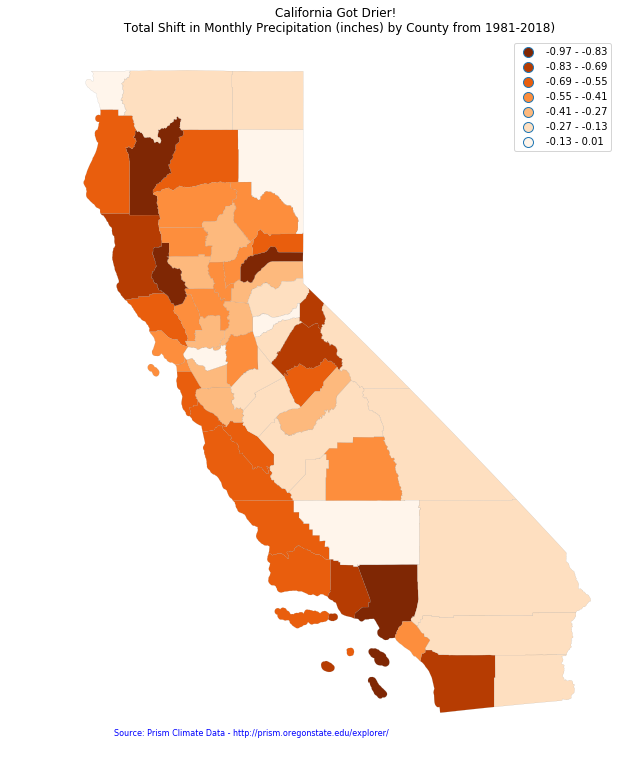

In [15]:
#Show precipitation change by county
# Also made a subheading by creating a new line
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='total_precip_change', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Oranges_r, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("California Got Drier! \n Total Shift in Monthly Precipitation (inches) by County from 1981-2018)", size=12)
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map
ax.set_axis_off()
ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "blue", fontsize=8)

plt.savefig('output/ca_precip.png')
plt.show()

#annotate source
# I saved the image into the working directory to send around


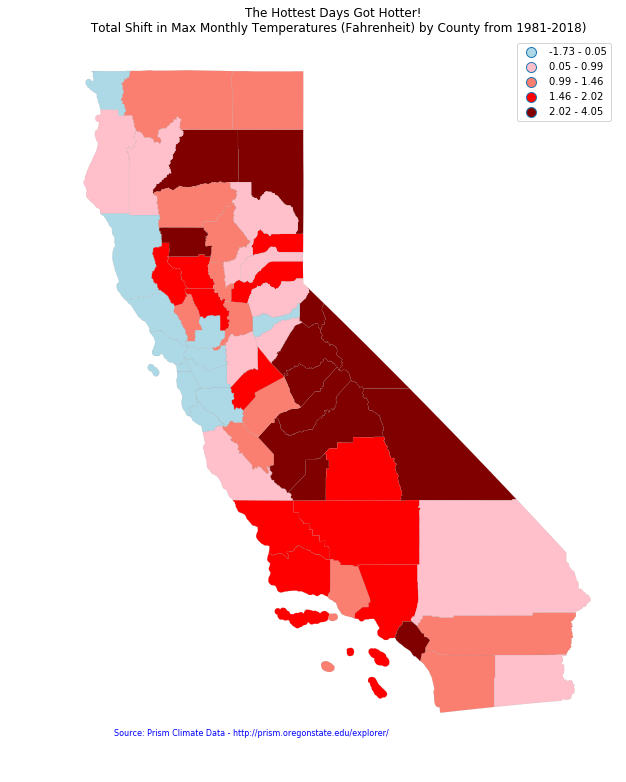

In [14]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightblue","pink","salmon", "red", "maroon"])

fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='total_maxtemp_change', legend = True, scheme='quantiles', k=5, 
         cmap=cmap, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("The Hottest Days Got Hotter!  \n Total Shift in Max Monthly Temperatures (Fahrenheit) by County from 1981-2018)", size=12)
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map
ax.set_axis_off()
ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "blue", fontsize=8)

plt.savefig('output/ca_maxtemp.png')
plt.show()

#annotate source
# I saved the image into the working directory to send around


## I made the maps with a black background to match website theme

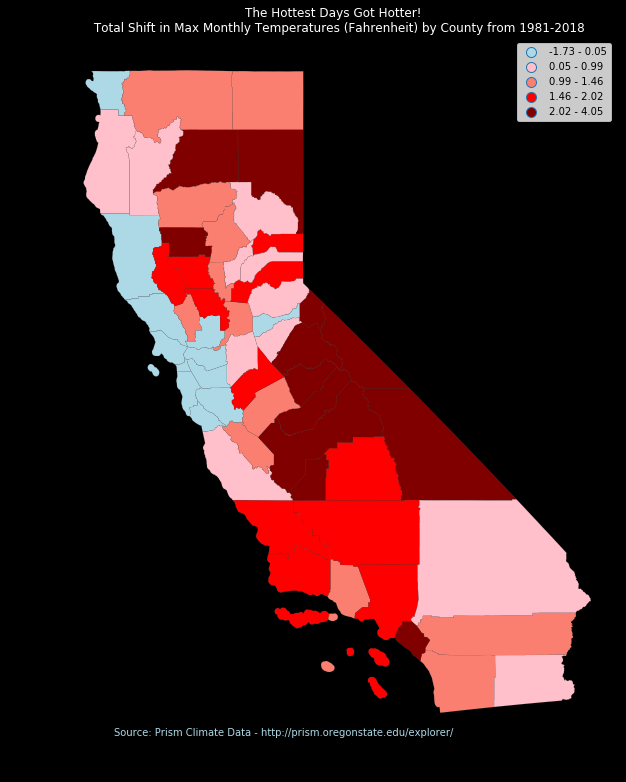

In [31]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightblue","pink","salmon", "red", "maroon"])

fig, ax = plt.subplots(1, figsize = (10,13), facecolor="black")
county_temps.plot(column='total_maxtemp_change', legend = True, scheme='quantiles', k=5, 
         cmap=cmap, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("The Hottest Days Got Hotter!  \n Total Shift in Max Monthly Temperatures (Fahrenheit) by County from 1981-2018", size=12, color="white")
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map

#ax.set_axis_bgcolor("lightslategray")
ax.set_axis_off()

ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "lightblue", fontsize=10)

plt.savefig('output/ca_maxtemp_black.png', facecolor="black")


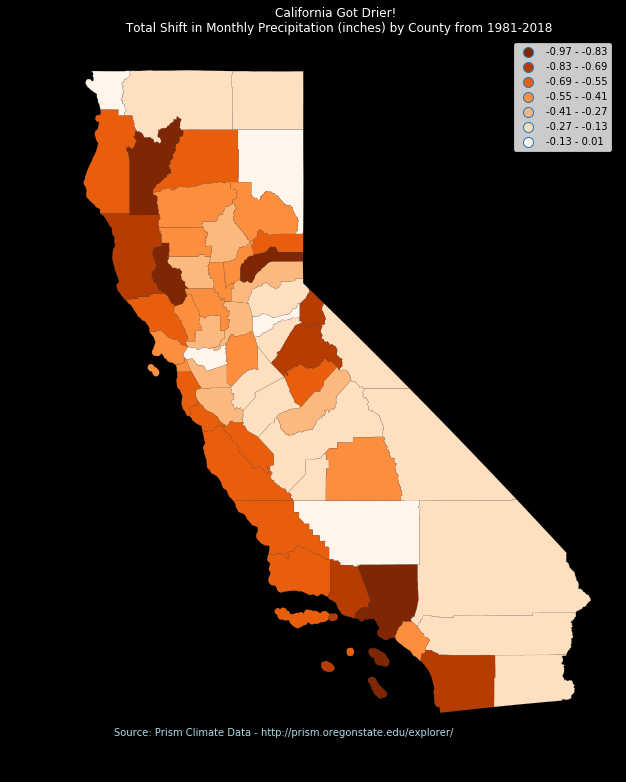

In [30]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13), facecolor="black")
county_temps.plot(column='total_precip_change', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Oranges_r, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("California Got Drier! \n Total Shift in Monthly Precipitation (inches) by County from 1981-2018", size=12, color="white")
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map
ax.set_axis_off()
ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "lightblue", fontsize=10)

plt.savefig('output/ca_precip_black.png', facecolor="black")
